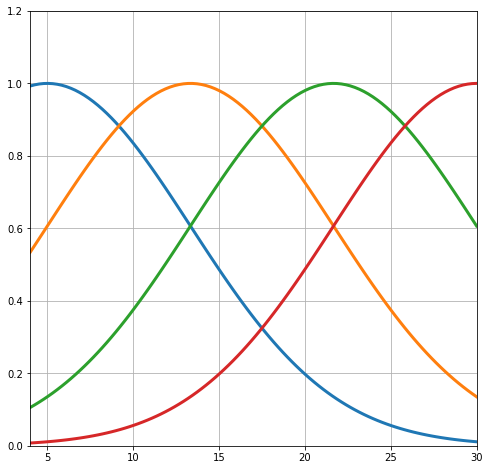

In [1]:
import numpy as np    
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
X_min=4
X_max=30
X_n=16
X=5+25*np.random.rand(X_n)

#X는 나이, T는 키

prm_c=[170,108,0.2]
T=prm_c[0]-prm_c[1]*np.exp(-prm_c[2]*X)+4*np.random.randn(X_n)
np.savez('ch.6_data.npz',X=X,X_min=X_min,X_max=X_max,X_n=X_n,T=T)

def gauss(x,mu,s):
    return np.exp(-(x-mu)**2/(2*s**2))     #가우스함수

M=4   #4개의 가우스함수를 만들겠다
plt.figure(figsize=(8,8))
mu=np.linspace(5,30,M)    #5에서30사이를 4등분 [5,11,17,23]
s=mu[1]-mu[0]
xb=np.linspace(X_min,X_max,100)   #4부터30까지 100개구간으로 나누기
for j in range(M):    #포문이 돌면서 가우스함수 4개를 만들어줌
    y=gauss(xb,mu[j],s)
    plt.plot(xb,y,linewidth=3)
    
plt.grid(True)
plt.xlim(X_min,X_max)
plt.ylim(0,1.2)
plt.show()
#파란게 파이1(가우스함수1),주황이 파이2,초록이 파이3,빨강이 파이4
#파이1의 중심이 mu[0],2의 중심이 mu[2]...

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98cm


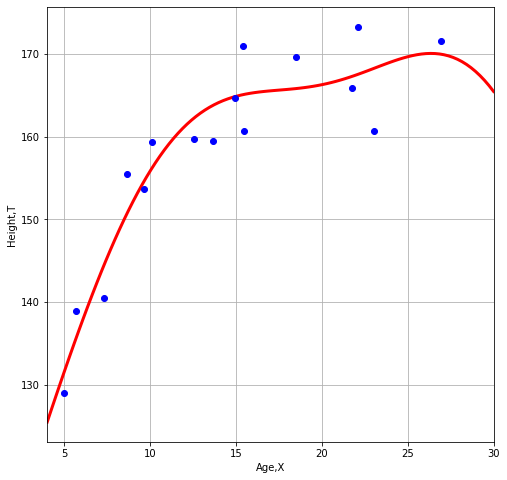

In [2]:
def gauss_func(w,x):   #가우스함수함수만듬
    m=len(w)-1       #w는 y=w0x0+w1x1+w2x2+...에서의 w이다 M=4이니 len(w)=4
    mu=np.linspace(5,30,m)
    s=mu[1]-mu[0]
    y=np.zeros_like(x)
    for j in range(m):
        y=y+w[j]*gauss(x,mu[j],s)
    y=y+w[m]
    return y
    
def mse_gauss_func(x,t,w):    #가우스함수의 평균제곱오차를 계산하는 함수
    y=gauss_func(w,x)
    mse=np.mean((y-t)**2)    #t는 훈련데이터의 출력
    return mse

def fit_gauss_func(x,t,m):   #가우스함수를 fitting, 이게 선형기저함수모델 코드
    mu=np.linspace(5,30,m)   #x는 훈련데이터입력, t는 훈련데이터 출력, m은 기저함수의 개수
    s=mu[1]-mu[0]
    n=x.shape[0]   
    psi=np.ones((n,m+1))
    for j in range(m):
        psi[:,j]=gauss(x,mu[j],s)  #이게 파이행렬
    psi_T=np.transpose(psi)  
    
    b=np.linalg.inv(psi_T.dot(psi))   #선형대수 라이브러리
    c=b.dot(psi_T)
    w=c.dot(t)
    return w  #  w=((파이T * 파이)^(-1))파이T*t

def show_gauss_func(w):
    xb=np.linspace(X_min,X_max,100)
    y=gauss_func(w,xb)
    plt.plot(xb,y,'r-',linewidth=3)
    plt.xlabel('Age,X')
    plt.ylabel('Height,T')
    
plt.figure(figsize=(8,8))
M=4
W=fit_gauss_func(X,T,M)
show_gauss_func(W)

plt.plot(X,T,'bo')
plt.xlim(X_min,X_max)
plt.grid(True)

mse=mse_gauss_func(X,T,W)
print('W='+str(np.round(W,1)))
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

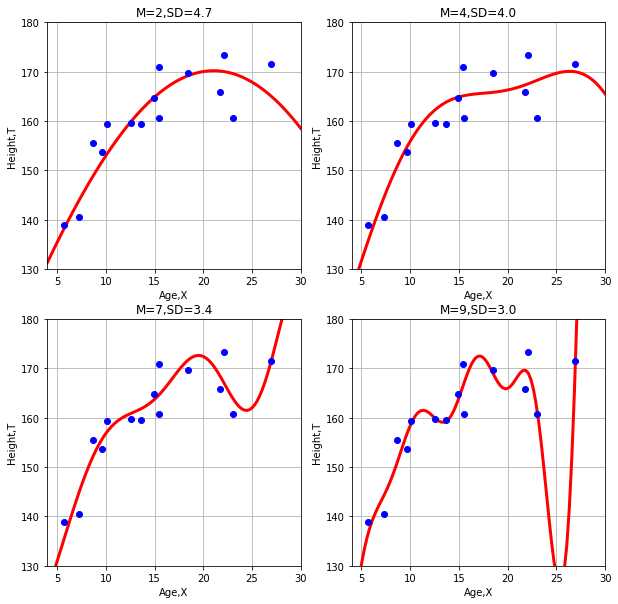

In [3]:
plt.figure(figsize=(10,10))
M=[2,4,7,9]
for i in range(len(M)):
    plt.subplot(2,2,i+1)
    W=fit_gauss_func(X,T,M[i])
    show_gauss_func(W)
    plt.plot(X,T,'bo')
    plt.xlim(X_min,X_max)
    plt.grid(True)
    plt.ylim(130,180)
    mse=mse_gauss_func(X,T,W)
    plt.title("M={0:d},SD={1:.1f}".format(M[i],np.sqrt(mse)))
plt.show()

In [4]:
#여기서부터 홀드아웃검증

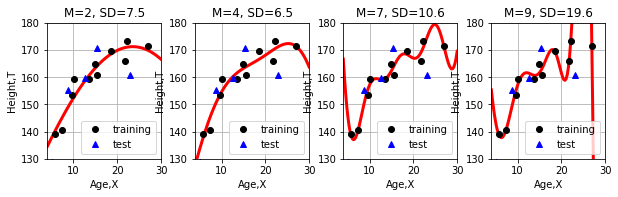

In [11]:
#데이터를 훈련집합에 3 : 테스트집합에 1 비율로 나눔

X_test = X[:int(X_n/4+1)]   # []안에는 16/4+1이니 5, X[:5]는 X[0]~X[4]까지를 X_test에 할당
T_test = T[:int(X_n/4+1)]   # T[0]~T[4]를 T_test에 넣음
X_train = X[int(X_n/4+1):]   # X[5:]는 X[5]부터 끝까지 
T_train = T[int(X_n/4+1):]    

plt.figure(figsize=(10,2.5))    #그림창크기조정
plt.subplots_adjust(wspace=0.3)   #서브플롯의 설정
M=[2,4,7,9]                       #선형기저함수모델의 기저함수개수
for i in range(len(M)):         # len(M)=4
    plt.subplot(1,len(M),i+1)   #그림 창을 1행 4열로 만들겟다 이 뜻
    W=fit_gauss_func(X_train,T_train,M[i])   #선형기저함수모델의 해석해
    show_gauss_func(W)    #그래프그리는함수
    plt.plot(X_train,T_train,'ko',label='training')
    plt.plot(X_test,T_test,'b^',label='test')
    plt.legend(loc='lower right',fontsize=10,numpoints=1)  #범례는 오른쪽아래
    plt.xlim(X_min,X_max)
    plt.ylim(130,180)
    plt.grid(True)
    mse=mse_gauss_func(X_test,T_test,W)    #이전까지는 훈련데이터(데이터를 나누지 않았으니 통합해서)에서만 mse(오차)를 측정했는데
                                        #이거는 훈련데이터와 테스트데이터를 구분한 뒤 테스트데이터에서 오차측정하는것
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
    
plt.show()

#이전에는 16개 데이터를 한번에 훈련, 테스트함
#이번엔 11개 데이터로 훈련, 5개 데이터로 테스트함

#오차(SD)는 테스트데이터에 대한 오차(파란색삼각형과의 오차)
#오차가 점차 늘어잠 즉, 테스트데이터에 대한 모델로는 적합하지 않다 라는 의미
#위에 저번시간 실습내용에서 오차(SD)는 점점 감소했었다.
#하지만 그건 데이터를 훈련데이터와 테스트데이터로 구분하지 않고 한번에
#훈련+테스트를 한것이기 때문에 그 데이터 안에서 오차는 작을지라도
#아직 들어오지 않은 새로운 값을 예측하기엔 적합하지 않다는 뜻이었다.
#이 실습코딩으로 그것을 증명한것.
#새로운 데이터(훈련에 사용하지 않은 데이터인 테스트데이터)에 대한 오차가 커지는것으로 보아서 말이다

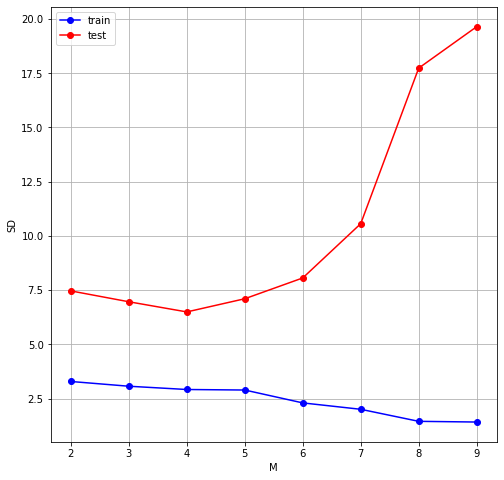

In [13]:
plt.figure(figsize=(8,8))
M=range(2,10)    # M=[2,3,4,5,6,7,8,9]
mse_train=np.zeros(len(M))  #훈련데이터의 오차를 저장하려고 영벡터생성  len(M)=8이기때문에 [0,0,0,0,0,0,0,0]
mse_test=np.zeros(len(M))   #테스트데이터의 오차를 저장하려고 영벡터생성  [0,0,0,0,0,0,0,0]

for i in range(len(M)):   #포문을 돌면서 오차측정   i는 0~7
    W=fit_gauss_func(X_train,T_train,M[i])
    mse_train[i]=np.sqrt(mse_gauss_func(X_train,T_train,W))#훈련데이터의 오차에 표준편차
    mse_test[i]=np.sqrt(mse_gauss_func(X_test,T_test,W))  #테스트데이터의 오차에 표준편차

plt.plot(M,mse_train,'b-o',label='train')
plt.plot(M,mse_test,'r-o',label='test')
plt.legend(loc='upper left',fontsize=10)
plt.xlabel('M')
plt.ylabel('SD')
plt.grid(True)
plt.show()
    
#빨간선은 테스트데이터와의 오차
#파란선은 훈련데이터와의 오차
#훈련데이터로 훈련했으니 훈련데이터와의 오차는 작다
#테스트데이터가 가장 우수한성능을 보이고 훈련데이터도 적절한 성능을 보이는
#M=4일때가 적절, 즉 M=4일때가 최적

In [22]:
#k-fold검증 함수만들자

def kfold_gauss_func(x,t,m,k):  #x나이 t키 m모델값(중첩개수) k몇개로나눌지
    n=x.shape[0]   #shape은 행의개수와 열의개수를 알려주는것, 즉 여기선 입력데이터의 개수
    mse_train=np.zeros(k)  #훈련집합으로 훈련한 값에서 발생한 오차를 저장할 벡터선언
    mse_test=np.zeros(k)   #데이터집합을 사용한 값에서 발생한 오차를 저장할 벡터선언
    
    for i in range(0,k):   # [0,1,2,3....k-1]    #fmod(a,b) 나머지연산자
        x_train=x[np.fmod(range(n),k)!=i] 
        t_train=t[np.fmod(range(n),k)!=i]  
        x_test=x[np.fmod(range(n),k)==i]   
        t_test=t[np.fmod(range(n),k)==i]
        #range(16)이라면 [0,1,2,3...15]
        #이거를 k=4일때 fmod(range9(n),k)하면 [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
        #i=0일때 [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]에서 i와 같지 않은것들은 1,2,3이다 
        #이런 같지 않은것들을 x_train으로 나머지는 x_test로 지정한다는뜻
        #즉 1/4은 훈련, 3/4은 테스트집합으로
        
        wm=fit_gauss_func(x_train,t_train,m) #최적 w를 찾는 함수
        mse_train[i]=mse_gauss_func(x_train,t_train,wm)  #훈련데이터에대한 오차
        mse_test[i]=mse_gauss_func(x_test,t_test,wm)  #테스트데이터에대한 오차
    return mse_train,mse_test


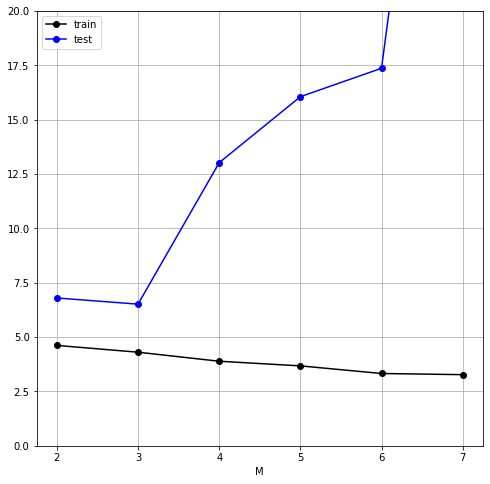

In [23]:
M=range(2,8)  #[2,3,4,5,6,7]
K=16   #그룹개수
Cv_gauss_train=np.zeros((K,len(M)))   #교차검증햇을때 나오는 값을 저장하기위한 영벡터
Cv_gauss_test=np.zeros((K,len(M)))  #저장하기위한 영벡터

for i in range(0,len(M)): #[0,1,2,3,4,5] i는 0~5
    Cv_gauss_train[:,i],Cv_gauss_test[:,i]=kfold_gauss_func(X,T,M[i],16)
    #16개의 오차값들이 각 행렬의 열로 들어감 그 열을 평균내면됨
mean_gauss_train=np.sqrt(np.mean(Cv_gauss_train, axis=0)) #16개의 오차에대한 평균
mean_gauss_test=np.sqrt(np.mean(Cv_gauss_test, axis=0))

plt.figure(figsize=(8,8))
plt.plot(M,mean_gauss_train,'k-o',label='train')
plt.plot(M,mean_gauss_test,'b-o',label='test')
plt.legend(loc='upper left')
plt.ylim(0,20)
plt.grid(True)
plt.xlabel('M')
plt.show()

#검정색은 훈련데이터의 오차, 얘는 M이 증가할수록(기저함수가 많으면) 오차적다
#파란색은 테스트데이터의 오차, 즉 학습에 참여하지 않은 데이터의 오차
# M=4,5,6,7..일때 과적합 즉, 적함한 M은 3

W=[ 344.8   -6.3  366.2 -259. ]
SD=4.37cm


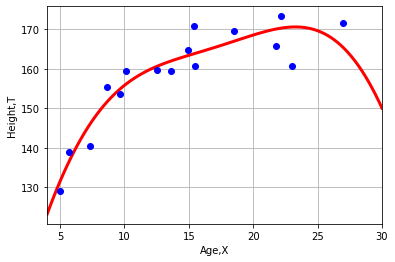

In [24]:
#찾아낸 최적의 M=3으로 다시 해봄 이건 위에있는 코드에서 M값만 3으로 바꾼것

M=3
W=fit_gauss_func(X,T,M)
show_gauss_func(W)

plt.plot(X,T,'bo')
plt.xlim(X_min,X_max)
plt.grid(True)

mse=mse_gauss_func(X,T,W)
print('W='+str(np.round(W,1)))
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()


#SD가 3.98에서 4.37로 증가하긴함 하지만 예전의 3.98이 너무잘나온거엿음 적합x
#여튼 25세이후에서 키가 줄어들음, 이건 선형모델의 한계
#그래서 우리는 비선형회귀모델을 사용할 필요가잇음

In [26]:
def model_A(x,w):   #비선형회귀모델 
    y=w[0]-w[1]*np.exp(-w[2]*x)
    return y

def show_model_A(w):   #모델A 보여줌
    xb=np.linspace(X_min,X_max,100)
    y=model_A(xb,w)
    plt.plot(xb,y)
    
def mse_model_A(w,x,t):  #평균제곱오차구하기
    y=model_A(x,w)
    mse=np.mean((y-t)**2)
    return mse

In [28]:
from scipy.optimize import minimize

def fit_model_A(w_init,x,t):  #초기값, 나이, 키
    res1=minimize(mse_model_A, w_init, args=(x,t), method='powell')
    #mse_model_A 함수이름(w,x,y)
    #w_init 초기값
    #args=(x,t) 구하고자 하는 변수를 제외한 입력들, 즉 w에대해서 최소화시켜라
    #method='powell' 파웰알고리즘을 사용해라(사이파이 라이브러리에 있음)
    return res1.x

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


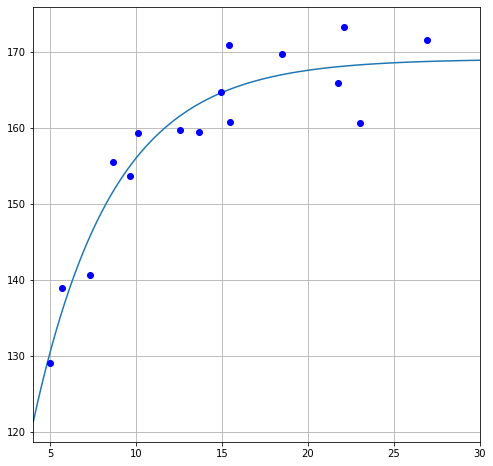

In [30]:
plt.figure(figsize=(8,8))
W_init=[100,0,0]   #w0은 100, w1은 0 w2는 0으로 초기값
W=fit_model_A(W_init,X,T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0],W[1],W[2]))
show_model_A(W)

plt.plot(X,T,'bo')
plt.xlim(X_min,X_max)
plt.grid(True)
mse=mse_model_A(W,X,T)

print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

#25세 이후에도 잘 나옴

Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


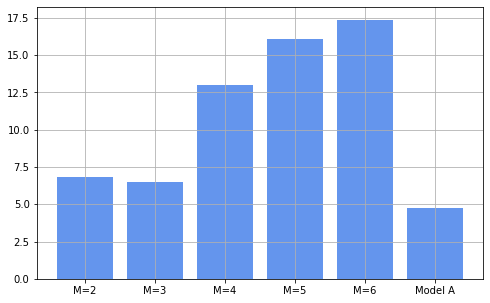

In [35]:
#k폴드 교차검증을 비선형모델에 적용하자

def kfold_model_A(x,t,k):
    n=len(x)
    mse_train=np.zeros(k)
    mse_test=np.zeros(k)
    
    for i in range(0,k):
        x_train=x[np.fmod(range(n),k)!=i] 
        t_train=t[np.fmod(range(n),k)!=i]  
        x_test=x[np.fmod(range(n),k)==i]   
        t_test=t[np.fmod(range(n),k)==i]
        
        wm=fit_model_A(np.array([169, 113, 0.2]),x_train, t_train)  #초기값
        mse_train[i]=mse_model_A(wm, x_train, t_train)
        mse_test[i]=mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test

K=16
Cv_A_train, Cv_A_test = kfold_model_A(X,T,K)
mean_A_test=np.sqrt(np.mean(Cv_A_test))  #평균오차

print("Gauss(M=3) SD={0:.2f} cm".format(mean_gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))

SD=np.append(mean_gauss_test[0:5], mean_A_test)
M=range(6)

label=["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]

plt.figure(figsize=(8,5))
plt.bar(M,SD,tick_label=label, align="center", facecolor="cornflowerblue")
#plt.bar(xy) 막대그래프만들어줌
#선형회귀모델과 비선형회귀모델과의 평균오차에 대한 그래프
#(선형회귀모델에서)M=3일때 오차가 6.51로 최저지만 비선형모델에선 4.72로 더 적다
plt.grid(True)
plt.show()